In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import os
import random
import zipfile
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
source_path = r"C:\Users\akush\Downloads\archive (1)\RiceLeafs"

# train source
source_path_train_Brownspot = os.path.join(source_path, 'train/BrownSpot')
source_path_train_Healthy   = os.path.join(source_path, 'train/Healthy')
source_path_train_Hispa     = os.path.join(source_path, 'train/Hispa')
source_path_train_LeafBlast = os.path.join(source_path, 'train/LeafBlast')

print(f"There are {len(os.listdir(source_path_train_Brownspot))} images of Train Brown Spot.")
print(f"There are {len(os.listdir(source_path_train_Healthy))} images of Train Healthy.")
print(f"There are {len(os.listdir(source_path_train_Hispa))} images of Train Hispa.")
print(f"There are {len(os.listdir(source_path_train_LeafBlast))} images of Train LeafBlast.\n")

# Validation source
source_path_validation_Brownspot  = os.path.join(source_path, 'validation/BrownSpot')
source_path_validation_Healthy    = os.path.join(source_path, 'validation/Healthy')
source_path_validation_Hispa      = os.path.join(source_path, 'validation/Hispa')
source_path_validation_LeafBlast  = os.path.join(source_path, 'validation/LeafBlast')

print(f"There are {len(os.listdir(source_path_validation_Brownspot))} images of Validation Brown Spot.")
print(f"There are {len(os.listdir(source_path_validation_Healthy))} images of Validation Healthy.")
print(f"There are {len(os.listdir(source_path_validation_Hispa))} images of Validation Hispa.")
print(f"There are {len(os.listdir(source_path_validation_LeafBlast))} images of Validation LeafBlast.\n")

There are 418 images of Train Brown Spot.
There are 1191 images of Train Healthy.
There are 452 images of Train Hispa.
There are 623 images of Train LeafBlast.

There are 105 images of Validation Brown Spot.
There are 297 images of Validation Healthy.
There are 113 images of Validation Hispa.
There are 156 images of Validation LeafBlast.



Sample Testing Healthy Rice Leaf:


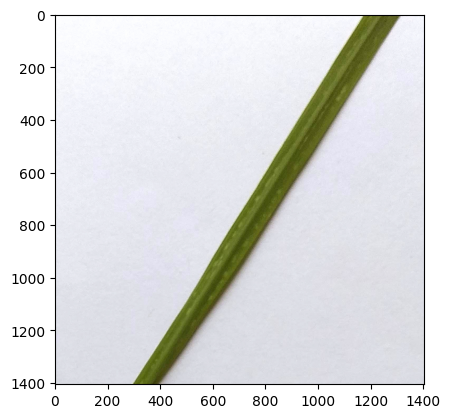

Sample Testing Hispa Rice Leaf:


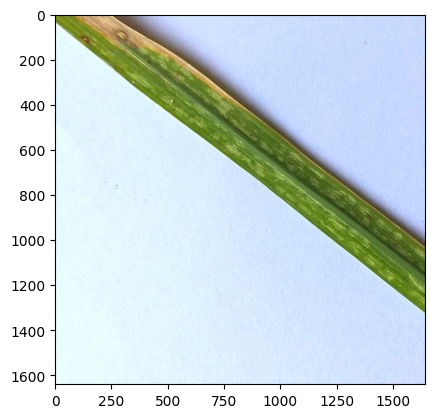

In [4]:
random_number = random.randint(0, len(os.listdir(source_path_validation_Hispa)))
print("Sample Testing Healthy Rice Leaf:")
plt.imshow(load_img(f"{os.path.join(source_path_train_Healthy, os.listdir(source_path_train_Healthy)[random_number])}"))
plt.show()

print("Sample Testing Hispa Rice Leaf:")
plt.imshow(load_img(f"{os.path.join(source_path_train_LeafBlast , os.listdir(source_path_train_LeafBlast )[random_number])}"))
plt.show()

In [5]:
TRAINING_DIR = os.path.join(source_path, 'train')
VALIDATION_DIR = os.path.join(source_path, 'validation')

In [6]:
dataset = []
shape = (224, 224)
count = 0
for file in os.listdir(TRAINING_DIR):
    path = os.path.join(TRAINING_DIR, file)
    time = 0
    for k in os.listdir(path):
        image = load_img(os.path.join(path, k), color_mode='grayscale', target_size=shape)
        image = img_to_array(image)
        image = image / 255.0
        dataset.append([image, count])
        time += 1
    count += 1


In [14]:
testset = []
count = 0
for file in os.listdir(VALIDATION_DIR):
    path = os.path.join(VALIDATION_DIR, file)
    t = 0
    for im in os.listdir(path):
        image = load_img(os.path.join(path, im), color_mode='rgb', target_size=shape)
        image = img_to_array(image)
        image = image / 255.0
        testset.append([image, count])
        t += 1
    count += 1


In [19]:
import os
import random
import zipfile
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Your previous code
data, trainlabels = zip(*dataset)
test, testlabels = zip(*testset)

labels1 = to_categorical(trainlabels)
labels = np.array(labels1)

data = np.array(data)
test = np.array(test)

trainx, testx, trainy, testy = train_test_split(data,
                                                labels,
                                                test_size=0.2,
                                                random_state=42)


In [20]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(2147, 224, 224, 1)
(537, 224, 224, 1)
(2147, 4)
(537, 4)


In [21]:
train_datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=30,
                             zoom_range=0.2,
                             width_shift_range=0.1,
                             height_shift_range=0.2,
                             shear_range=0.2)

In [22]:
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(224,224,3),
                                                      include_top=False,
                                                      weights='imagenet')

In [ ]:
# pretrained_model.summary()

In [23]:
inputs = pretrained_model.input
x = tf.keras.layers.Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
print("Shape of trainx:", trainx.shape)
print("Shape of testx:", testx.shape)

# Check color mode of input images
if trainx.shape[-1] == 1:
    print("Input images are grayscale.")
elif trainx.shape[-1] == 3:
    print("Input images are RGB.")
else:
    print("Unknown color mode.")

# Adjust preprocessing or model architecture based on the above information


Shape of trainx: (2147, 224, 224, 1)
Shape of testx: (537, 224, 224, 1)
Input images are grayscale.


In [30]:
# Add this import statement at the beginning of your code
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

num_classes = len(np.unique(trainlabels))


# Define your model architecture
model = Sequential([
    Input(shape=(224, 224, 1)),  # Adjust input shape for grayscale images
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust num_classes accordingly
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
his = model.fit(train_datagen.flow(trainx, trainy, batch_size=32),
                validation_data=(testx, testy),
                epochs=30,
                verbose=1)


Epoch 1/30


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 46s 652ms/step - accuracy: 0.2931 - loss: 20.8133 - val_accuracy: 0.4618 - val_loss: 1.6324
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 45s 653ms/step - accuracy: 0.3403 - loss: 1.5240 - val_accuracy: 0.4618 - val_loss: 1.2867
Epoch 3/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 633ms/step - accuracy: 0.3982 - loss: 1.3484 - val_accuracy: 0.2160 - val_loss: 1.4391
Epoch 4/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 45s 656ms/step - accuracy: 0.3348 - loss: 1.4820 - val_accuracy: 0.4618 - val_loss: 1.2962
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 49s 706ms/step - accuracy: 0.4093 - loss: 1.3334 - val_accuracy: 0.4618 - val_loss: 1.2943
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 46s 661ms/step - accuracy: 0.4349 - loss: 1.3090 - val_accuracy: 0.4618 - val_loss: 1.2729
Epoch 7/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 47s 683ms/step - accuracy: 0.4324 - loss: 1.3287 - val_accuracy: 0.4618 - val_loss: 1.2826
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 46s 666ms/step - accuracy: 0.3971 - loss: 1.3523 - val_accuracy: 0.46

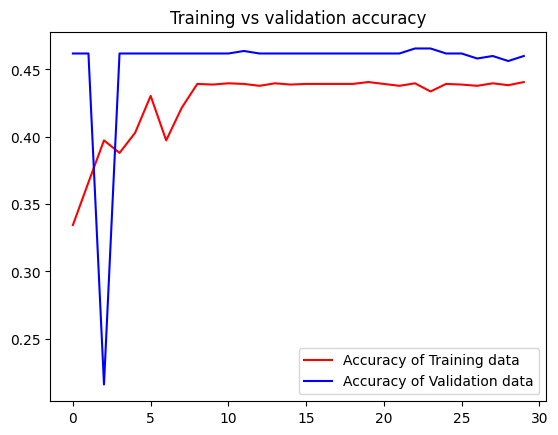

<Figure size 640x480 with 0 Axes>

In [35]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

Epoch 1/2


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


68/68 ━━━━━━━━━━━━━━━━━━━━ 47s 670ms/step - accuracy: 0.3259 - loss: 25.7963 - val_accuracy: 0.2104 - val_loss: 2.2423
Epoch 2/2
68/68 ━━━━━━━━━━━━━━━━━━━━ 44s 634ms/step - accuracy: 0.3703 - loss: 1.6755 - val_accuracy: 0.3464 - val_loss: 1.3260


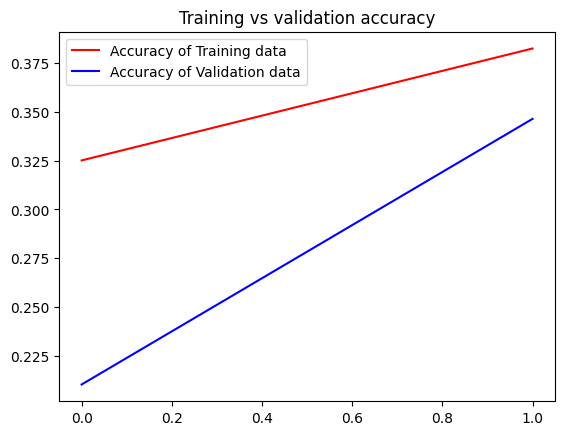

<Figure size 640x480 with 0 Axes>

TypeError: this __dict__ descriptor does not support '_DictWrapper' objects

In [64]:
# Add this import statement at the beginning of your code
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

num_classes = len(np.unique(trainlabels))

# Define your model architecture
model = Sequential([
    Input(shape=(224, 224, 1)),  # Adjust input shape for grayscale images
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Adjust num_classes accordingly
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
his = model.fit(train_datagen.flow(trainx, trainy, batch_size=32),
                validation_data=(testx, testy),
                epochs=2,
                verbose=1)

get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

import tensorflow as tf

# Save the model in TensorFlow SavedModel format
tf.saved_model.save(model, "saved_model")

# Convert the SavedModel to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
tflite_model = converter.convert()